<a href="https://colab.research.google.com/github/AdarshShah/Mars-Tycho-Brahe-Kepler/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mars Orbit
Author : Adarsh Shah

Date : 18th Aug, 2021 

In [289]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from math import radians, cos, sin, tan, sqrt, fmod, atan, degrees
import datetime
from scipy import optimize as op

# Data Preparation

In [387]:
# Orbit Center in degrees
c = 120
# Orbit radius
r = 10
# Equant Center
e1 = 1
e2 = 93
# Equant 0 in degrees
z = 57
# Mars angular velocity in degrees per day
s = 360/687
# Data Path
path = "/content/01_data_mars_opposition_updated.csv"

In [293]:
data = pd.read_csv(path)
 
lg = np.array(data['ZodiacIndex']*30 + data['Degree'] + data['Minute']/60 + data['Second']/3600)
elg = [ 0 ]
for i in range(1,12):
  d1 = datetime.datetime(data['Year'][i],data['Month'][i],data['Day'][i],data['Hour'][i],data['Minute.1'][i])
  d2 = datetime.datetime(data['Year'][i-1],data['Month'][i-1],data['Day'][i-1],data['Hour'][i-1],data['Minute.1'][i-1])
  ddelta = d1-d2
  elg += [elg[-1]+ddelta.days+ddelta.seconds/(3600*24)]
elg = np.array(elg)
 
elg.resize((12,1))
lg.resize(12,1)
oppositions=np.append(lg,elg,axis=1)

# Utils

In [294]:
# Equant Polar to co-ordinate
def p2c(e1,e2):
  x = e1*cos(radians(fmod(e2+z,360)))
  y = e1*sin(radians(fmod(e2+z,360)))
  return x,y

In [295]:
# Equant Co-ordinate to Polar
def c2p(x,y):
  e1 = sqrt(x**2+y**2)
  e2 = degrees(atan(y/x))
  return e1,e2

In [296]:
# Intersection of Latitude and orbit.
def intersect(e1,e2,m,c,r):
    f = lambda x : [(x[0]-cos(radians(c)))**2 + (x[1]-sin(radians(c)))**2 - r**2,tan(radians(m))*(e1-x[0])-(e2-x[1])]
    res = op.fsolve(func=f,x0=[e1+2*r*cos(radians(m)),e2+2*r*sin(radians(m))])
    return res

In [388]:
def quad(e1,e2,m,c,r):
  cx = np.cos(np.radians(c))
  cy = np.sin(np.radians(c))

  tn = np.tan(np.radians(m))

  a = (1 + tn ** 2)
  b = -2 * cx + 2 * tn * (e2 - cy - e1 * tn)
  c = (e2 - cy - e1 * tn) ** 2 + cx ** 2 - r ** 2

  discrm = np.sqrt(b ** 2 - 4 * a * c)

  x1 = (-b - discrm) / (2 * a)
  x2 = (-b + discrm) / (2 * a)

  y1 = e2 + (x1 - e1) * tn
  y2 = e2 + (x2 - e1) * tn

  if 0 <= m <= 90 or 270 <= m <= 360:
      X_circle = x1 if x1 >= 0 else x2
      Y_circle = y1 if x1 >= 0 else y2
  else:
      X_circle = x1 if x1 <= 0 else x2
      Y_circle = y1 if x1 <= 0 else y2
  
  return X_circle,Y_circle

In [202]:
# Distance between two co-ordinates.
def distance(x,y):
  return sqrt((y[0]-x[0])**2+(y[1]-x[1])**2)

In [389]:
# Plot
def plot(c,r,e1,e2,z,s,oppositions):
  plt.scatter(cos(radians(c)),sin(radians(c)),c='r')
  plt.scatter(e1,e2,c='b')
  plt.scatter(0,0,c='g')
  
  for o in oppositions[:,0]:
    plt.arrow(0,0,1.5*r*cos(radians(o)),1.5*r*sin(radians(o)),ls='-')
    x,y = quad(0,0,o,c,r)
    plt.scatter(x,y)

  for o in oppositions[:,1]:
    m = fmod(o*s+z,360)
    ex = e1*np.cos(radians(e2+z))
    ey = e1*np.sin(radians(e2+z))
    plt.arrow(ex,ey,1.5*r*cos(radians(m)),1.5*r*sin(radians(m)),ls=':')
    
    x,y = quad(ex,ey,m,c,r)
    plt.scatter(x,y)

  x = np.radians(np.arange(0,360))
  plt.plot(cos(radians(c))+r*np.cos(x),sin(radians(c))+r*np.sin(x))


In [147]:
def PlotOut(oppositionsf, zf, cf, rf, e1f, e2f,sf):
    oppositionsf = np.array(oppositionsf).T
    T = 360/sf
    C_dis = 1
    cx = C_dis * np.cos(np.radians(cf))
    cy = C_dis * np.sin(np.radians(cf))
    xp = np.linspace(0, rf+3, 200)
    xn = np.linspace(-(rf+3), 0, 200)
    ex = e1f * np.cos(np.radians(e2f +zf))
    ey = e1f * np.sin(np.radians(e2f +zf))
    Dotline_A = ((oppositionsf[1] * sf) + zf) % 360
    Solidline_A= oppositionsf[0]
    # print('c',cf,'r',rf,'e1',e1f,'e2',e2f,'z',zf,'s',s)
    # print('\n Data _ opposition',oppositionsf)
    # print('\ncx',cx,'cy',cy,'ex',ex,'ey',ey)
    for i in range(0, np.shape(Dotline_A)[0]):
        if 0 <= Solidline_A[i] <= 90 or 270 <= Solidline_A[i] <= 360:
            plt.plot(xp, xp * np.tan(np.radians(Solidline_A[i])), label='Line' + str(i), linestyle="-",
                     linewidth=1 + i * .05)
            plt.text((rf-3)/2, (rf-3)/2 * np.tan(np.radians(Solidline_A[i])), str(i), fontsize=8,color='green')
        else:
            plt.plot(xn, xn * np.tan(np.radians(Solidline_A[i])), label='Line' + str(i), linestyle="-",
                     linewidth=1 + i * .05)
            plt.text(-(rf - 3) / 2, -(rf - 3) / 2 * np.tan(np.radians(Solidline_A[i])), str(i), fontsize=8, color='green')
    xp = np.linspace(ex, rf+3, 200)
    xn = np.linspace(-(rf+3), ex, 200)
    for i in range(0, np.shape(Dotline_A)[0]):
        if 0 <= Dotline_A[i] <= 90 or 270 <= Dotline_A[i] <= 360:
            plt.plot(xp, ((xp - ex) * np.tan(np.radians(Dotline_A[i])) + ey), label='Line' + str(i),
                     linestyle="--", linewidth=1 + i * .05)
            plt.text((rf - 1) / 2, (((rf - 1) / 2 - ex) * np.tan(np.radians(Dotline_A[i])) + ey), str(i), fontsize=8, color='black')
        else:
            plt.plot(xn, (xn - ex) * np.tan(np.radians(Dotline_A[i])) + ey, label='Line' + str(i),
                     linestyle="--", linewidth=1 + i * .05)
            plt.text(-(rf - 1) / 2, ((-(rf - 1) / 2 - ex) * np.tan(np.radians(Dotline_A[i])) + ey), str(i), fontsize=8, color='black')
    X_circle = np.array([np.nan for x in range(0,np.shape(Dotline_A)[0])])
    Y_circle = np.array([np.nan for x in range(0,np.shape(Dotline_A)[0])])
    for k in range(0, np.shape(Dotline_A)[0]):
        tanValue = np.tan(np.radians(Dotline_A[k]))
        a = (1 + tanValue ** 2)
        b = -2 * cx + 2 * tanValue * (ey - cy - ex * tanValue)
        c = (ey - cy - ex * tanValue) ** 2 + cx ** 2 - rf ** 2
        delta = np.sqrt(b ** 2 - 4 * a * c)
        x1 = (-b - delta) / (2 * a)
        x2 = (-b + delta) / (2 * a)
        y1 = ey + (x1 - ex) * tanValue
        y2 = ey + (x2 - ex) * tanValue
        plt.plot(x1, y1, 'go')
        plt.plot(x1, y1, 'ro')
        if 0 <= Dotline_A[k] <= 90 or 270 <= Dotline_A[k] <= 360:
            X_circle[k] = x1 if x1 >= 0 else x2
            Y_circle[k] = y1 if x1 >= 0 else y2
        else:
            X_circle[k] = x1 if x1 <= 0 else x2
            Y_circle[k] = y1 if x1 <= 0 else y2
        plt.plot(X_circle[k],Y_circle[k] , 'bo')
    plt.annotate('Rotating Axis Ref', xy=(.5, (-ex + .5) * np.tan(np.radians(zf)) + ey), xytext=(rf*.5, rf*.5),
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
    plt.annotate('Equant', xy=(ex, ey), xytext=(2, 2),
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
    theta = np.radians(np.linspace(0, 360 * 2, 100))
    plt.plot(cx + rf * np.cos(theta), cy + rf * np.sin(theta) )
    plt.plot(cx,cy,'ro')

In [390]:
def obj(X,oppositions):
  c,r,e1,e2,z,s=X
  e,emax = MarsEquantModel(c,r,e1,e2,z,s,oppositions)
  return emax

In [184]:
def objrs(X,Y):
  c,e1,e2,z=X
  r,s,oppositions = Y
  e,emax = MarsEquantModel(c,r,e1,e2,z,s,oppositions)
  return emax

In [186]:
def objs(X,Y):
  c,r,e1,e2,z=X
  s,oppositions = Y
  e,emax = MarsEquantModel(c,r,e1,e2,z,s,oppositions)
  return emax

# 1. MarsEquantModel

In [402]:
def MarsEquantModel(c,r,e1,e2,z,s,oppositions):
  # Intersection of Heliolongitudes and orbit
  ol = list()
  #Intersection of Equantlongitudes and orbit
  el = list()

  for o in oppositions[:,0]:
    x,y = quad(0,0,o,c,r)
    ol.append([x,y])

  for o in oppositions[:,1]:
    ex = e1*cos(np.radians(e2+z))
    ey = e1*sin(np.radians(e2+z))
    x,y = quad(ex,ey,fmod(o*s+z,360),c,r)
    el.append([x,y])
  x = np.radians(np.arange(0,360))
  d1 = list()
  d2 = list()
  d3 = list()

  for x in el:
    d1.append(np.degrees(np.arctan2(x[1],x[0])))
  
  d3 = [i if i<=180 else i-360 for i in oppositions[:,0]]
  d2 = [a-b for a,b in zip(d1,d3)]
  print(d3,d1)
  # Errors
  errors = np.array(d2)
  max_error = np.max(np.abs(errors))
  return errors,max_error

In [403]:
MarsEquantModel(c,r,e1,e2,z,s,oppositions)

[66.52638888888889, 106.97500000000001, 141.2361111111111, 175.38333333333333, -145.61666666666667, -93.28333333333336, -17.55000000000001, 47.66111111111111, 92.73333333333333, 128.03333333333333, 162.21666666666667, -161.6138888888889] [62.45698842878941, 104.52247370582803, 142.0379448521443, 178.9658455915864, -140.35726647967564, -88.35014196392864, -17.99479003661074, 43.34282262333133, 88.86263517834912, 127.57964458033685, 164.2997989279896, -157.09050776034903]


(array([-4.06940046, -2.45252629,  0.80183374,  3.58251226,  5.25940019,
         4.93319137, -0.44479004, -4.31828849, -3.87069815, -0.45368875,
         2.08313226,  4.52338113]), 5.25940018699103)

#2. BestOrbitInnerParams





In [367]:
def bestOrbitInnerParams(r,s,oppositions):
  cf = 10
  e1f = 1
  e2f = 10
  print("Computing: [",end='')
  def obj(X0,oppositions):
    c,e1,e2,z = X0
    e,emax = MarsEquantModel(c,r,e1,e2,z,s,oppositions)
    return emax
  for i in range(3):
    print("*",end='')
    z = np.linspace(0,360,360)
    z_error = np.array([obj((cf,e1f,e2f,i),oppositions) for i in z])
    zf = z[z_error.argmin()]
    
    e2 = np.linspace(zf,360,360)
    e2_error = np.array([obj((cf,e1f,i,zf),oppositions) for i in e2])
    e2f = e2[e2_error.argmin()]
    
    c = np.linspace(0,360,360)
    c_error = np.array([obj((i,e1f,e2f,zf),oppositions) for i in c])
    cf = c[c_error.argmin()]
    
    e1 = np.linspace(0,0.5*r,300)
    e1_error = np.array([obj((cf,i,e2f,zf),oppositions) for i in e1])
    e1f = e1[e1_error.argmin()]
    
  print("]")
  res = op.minimize(fun=obj,x0=[cf,e1f,e2f,zf],args=oppositions,method='Nelder-Mead', options={'xatol' : 1e-5 ,'disp':False, 'return_all' :False})
  errors,maxError = MarsEquantModel(cf,r,e1f,e2f,zf,s,oppositions)
  return cf,e1f,e2f,zf,errors,maxError


In [368]:
bestOrbitInnerParams(10,360/687,oppositions)

Computing: [***]


(228.6350974930362,
 1.6722408026755853,
 145.16367812167812,
 55.15320334261838,
 array([-0.71337294, -0.88597768, -0.87866475, -0.56939456,  0.50080438,
         1.2633567 , -1.06496396, -1.26935221, -1.27506403, -0.85154995,
        -1.28842847, -0.23521396]),
 1.2884284650682005)

#3. BestS

In [369]:
def bestS(r,oppositions):
  maxError = 720
  sgood = 360/687
  print("BestS :")
  iter=1
  for s in np.linspace(360/(687+0.1),360/(687-0.1),12):
    print(f'{iter:2}: ',end='')
    iter+=1
    _c,_e1,_e2,_z,_errors,_maxError = bestOrbitInnerParams(r,s,oppositions)
    if maxError > _maxError:
      c,e1,e2,z,errors,maxError=_c,_e1,_e2,_z,_errors,_maxError
      sgood = s
  print("]")
  #optimizing in the neighbourhood of c,e1,e2,z,s
  '''res = op.minimize(fun=obj,x0=[c,r,e1,e2,z,sgood],args=oppositions,method='Nelder-Mead', options={'xatol' : 1e-5 ,'disp':False, 'return_all' :False})
  c,r,e1,e2,z,s = res.x
  errors,maxError = MarsEquantModel(c,r,e1,e2,z,s,oppositions)'''
  c,e1,e2,z,errors,maxError = bestOrbitInnerParams(r,sgood,oppositions)
  return sgood,errors,maxError

In [370]:
bestS(10,oppositions)

BestS :
 1: Computing: [***]
 2: Computing: [***]
 3: Computing: [***]
 4: Computing: [***]
 5: Computing: [***]
 6: Computing: [***]
 7: Computing: [***]
 8: Computing: [***]
 9: Computing: [***]
10: Computing: [***]
11: Computing: [***]
12: Computing: [***]
]
Computing: [***]


(0.5239828073527381,
 array([ 0.33859216,  0.20618486,  0.44936234,  0.42655146,  0.40134072,
         0.4537645 , -0.31876465, -0.27359085, -0.44911448,  0.2472302 ,
        -0.23008916, -0.02754058]),
 0.45376450185987116)

#4. BestR

In [346]:
def bestR(s,oppositions):
  maxError = 720
  rgood = 9
  print("BestR :")
  iter=1
  def obj(X0,opposition):
    c,r,e1,e2,z = X0

  for r in np.linspace(8,9,10):
    print(f'{iter:2}: ',end='')
    iter+=1
    _c,_e1,_e2,_z,_errors,_maxError = bestOrbitInnerParams(r,s,oppositions)
    if maxError > _maxError:
      c,e1,e2,z,errors,maxError=_c,_e1,_e2,_z,_errors,_maxError
      rgood = r
  print("]")
  #optimizing in the neighbourhood of c,r,e1,e2,z
  #res = op.minimize(fun=obj,x0=[c,rgood,e1,e2,z,s],args=oppositions,method='Nelder-Mead', options={'xatol' : 1e-5 ,'disp':False, 'return_all' :False})
  c,e1,e2,error,maxError = bestOrbitInnerParams(rgood,s,oppositions)
  return rgood,errors,maxError

In [374]:
def bestR(s,oppositions):
  maxError = 720
  iter = 1
  best_rf = 5
  for o_rf in np.linspace(5,10,10):
    _c,_e1,_e2,_z,_errors,_maxError = bestOrbitInnerParams(o_rf,s,oppositions)
    if maxError>_maxError:
      c,e1,e2,z,errors,maxError = _c,_e1,_e2,_z,_errors,_maxError
      best_rf = o_rf
    cx = np.cos(np.radians(_c))
    cy = np.sin(np.radians(_c))
    ex = _e1 * np.cos(np.radians(_e2))
    ey = _e1 * np.sin(np.radians(_e2))
    Dotlinef = (oppositions.T[1] * s + _z) % 360
    # print('Doted line Angle=', Dotlinef)
    X_Line = (ey-ex*np.tan(np.radians(Dotlinef))) / (np.tan(np.radians(oppositions.T[0]))-np.tan(np.radians(Dotlinef)))
    Y_Line = X_Line * np.tan(np.radians(oppositions.T[0]))
    dis_C = np.sqrt((X_Line - cx) ** 2 + (Y_Line - cy) ** 2)
    New_rf = np.mean(dis_C)
    print(New_rf)
    for rf in np.linspace(New_rf,min(10,New_rf+0.5),5):
      _c,_e1,_e2,_z,_errors,_maxError = bestOrbitInnerParams(rf,s,oppositions)
      if maxError>_maxError:
        best_rf = rf
        print("Change "+str(best_rf))
  c,e1,e2,z,errors,maxError = bestOrbitInnerParams(best_rf,s,oppositions)
  return best_rf,errors,maxError


In [375]:
bestR(s,oppositions)

Computing: [***]
5.210711600736482
Computing: [***]
Change 5.210711600736482
Computing: [***]
Change 5.335711600736482
Computing: [***]
Change 5.460711600736482
Computing: [***]
Change 5.585711600736482
Computing: [***]
Change 5.710711600736482
Computing: [***]
5.835774410811735
Computing: [***]
Change 5.835774410811735
Computing: [***]
Change 5.960774410811735
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
5.7921653147128795
Computing: [***]
Change 5.7921653147128795
Computing: [***]
Change 5.9171653147128795
Computing: [***]
Change 6.0421653147128795
Computing: [***]
Computing: [***]
Computing: [***]
6.970157354040914
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
7.063971871044067
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
7.411919040911478
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
7.9128716

(6.666666666666667,
 array([ 0.41479436, -0.01545418,  0.32622462,  0.41145973,  0.19143523,
         0.03315361,  0.25659297,  0.24513393, -0.43371923,  0.22886851,
        -0.09500776,  0.06068025]),
 0.43371922544444264)

#5. BestMarsOrbitParams

In [377]:
def bestMarsOrbitParams(oppositions):
  r = 5
  s = 360/687
  emaxt = 1
  while(emaxt>4/60):
    s,er,emax = bestS(r,oppositions)
    r,er,emax = bestR(s,oppositions)

    c,e1,e2,z,errors,emax = bestOrbitInnerParams(r,s,oppositions)
    res = op.minimize(fun=obj,x0=[c,r,e1,e2,z,s],args=oppositions,method='Nelder-Mead', options={'xatol' : 1e-5 ,'disp':False, 'return_all' :False})
    c,r,e1,e2,z,s = res.x
    if(emaxt-emax)<0.01:
      break
    emaxt = emax
    print(c,r,e1,e2,z,s,emax)
  plot(c,r,e1,e2,z,s,oppositions)
  plt.xlim(-(r + 3), r + 3)
  plt.ylim(-(r + 3), r + 3)
  plt.grid()
  plt.show()
  print([e1,e2])
  e1,e2 = c2p(e1,e2)
  return r,s,c,e1,e2,z,er,emax

BestS :
 1: Computing: [***]
 2: Computing: [***]
 3: Computing: [***]
 4: Computing: [***]
 5: Computing: [***]
 6: Computing: [***]
 7: Computing: [***]
 8: Computing: [***]
 9: Computing: [***]
10: Computing: [***]
11: Computing: [***]
12: Computing: [***]
]
Computing: [***]
Computing: [***]
4.764103400262352
Computing: [***]
Computing: [***]
Computing: [***]
Change 5.014103400262352
Computing: [***]
Change 5.139103400262352
Computing: [***]
Change 5.264103400262352
Computing: [***]
5.369754069428048
Computing: [***]
Change 5.369754069428048
Computing: [***]
Change 5.494754069428048
Computing: [***]
Change 5.619754069428048
Computing: [***]
Change 5.744754069428048
Computing: [***]
Change 5.869754069428048
Computing: [***]
6.09595552982467
Computing: [***]
Change 6.09595552982467
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
6.686167441477665
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
Computing: [***]
7

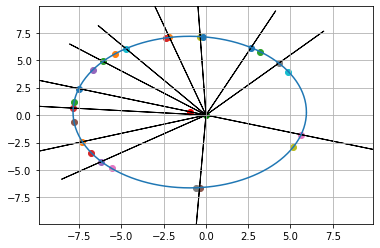

[1.303956739914443, 148.12807041559088]


(6.904500648440575,
 0.5240891749512813,
 164.15863597917422,
 148.13380960545712,
 89.49564395237483,
 55.478262438595706,
 array([ 0.20583456, -0.36067626, -0.34144801, -0.30869318, -0.29602637,
        -0.46551213, -0.51642892,  0.33230115, -0.26945562,  0.03853179,
        -0.46782984, -0.13490377]),
 0.5164289229287145)

In [378]:
bestMarsOrbitParams(oppositions)

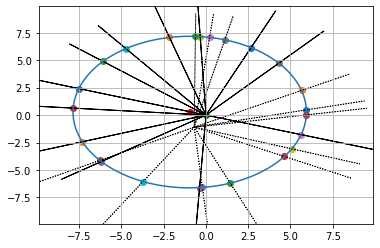

In [384]:
ex = 1.6029181600675653*cos(91.94272990410497+55.48468260460285)
ey = 1.6029181600675653*sin(91.94272990410497+55.48468260460285)
plot(164.15863597917422, 6.904500648440575, 1.303956739914443, 148.12807041559088, 89.49564395237483,55.478262438595706,oppositions)
plt.xlim(-(6.904500648440575 + 3), 6.904500648440575 + 3)
plt.ylim(-(6.904500648440575 + 3), 6.904500648440575 + 3)
plt.grid()
plt.show()

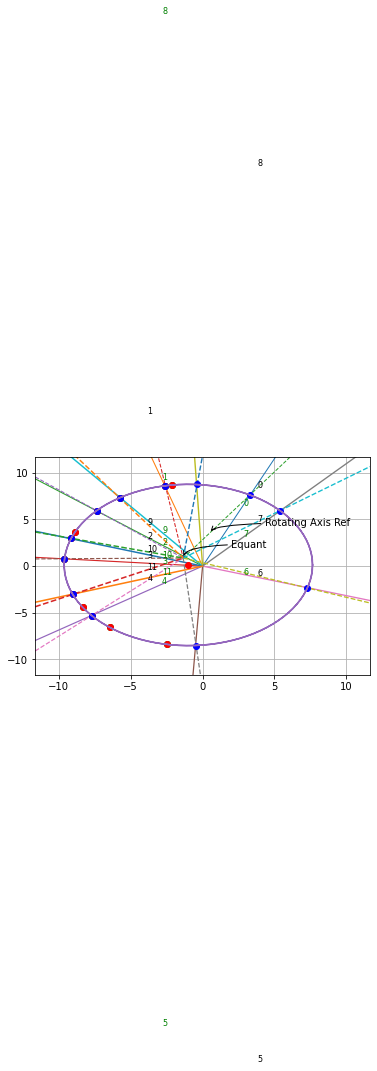

In [148]:
PlotOut(oppositions,55.48468260460285,172.9987003991455,8.64818816391562,1.6029181600675653,91.94272990410497,0.5240933473326761)
plt.xlim(-(8.64818816391562 + 3), 8.64818816391562 + 3)
plt.ylim(-(8.64818816391562 + 3), 8.64818816391562 + 3)
plt.grid()
plt.show()

In [126]:
oppositions.T[1]

array([   0.        ,  770.10208333, 1534.75555556, 2299.26041667,
       3069.20486111, 3854.26041667, 4663.65833333, 5459.96041667,
       6234.58333333, 7000.54861111, 7764.54097222, 8531.63125   ])